In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("DataFiles/SMOTE_data.csv")
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = df.iloc[:,1:]
y = df["DTP"]


In [5]:
X.head(1)

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,0.291141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.to_frame().head()

,DTP
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
4871,0.196335,0.000000,0.248824,0.335523,0.073026,0.095623,0.105833,0.190496,0.335232,0.300013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4337,0.056114,0.105164,0.355622,0.065074,0.099132,0.259694,0.057467,0.103438,0.055168,0.633626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.297627,0.059353,0.144460,0.132186,0.302053,0.167448,0.045400,0.571969,0.099616,0.301326,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.266510,0.047824,0.194043,0.184124,0.210396,0.172441,0.069700,0.501710,0.172832,0.320121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,0.165186,0.027328,0.258601,0.450685,0.240297,0.109201,0.069667,0.394012,0.210144,0.203728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [12]:
# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nick/opt/anaconda3/envs/Torch_SB2/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.70%
Confusion Matrix:
 [[1024   38]
 [  76 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1062
           1       0.96      0.93      0.95      1089

    accuracy                           0.95      2151
   macro avg       0.95      0.95      0.95      2151
weighted avg       0.95      0.95      0.95      2151



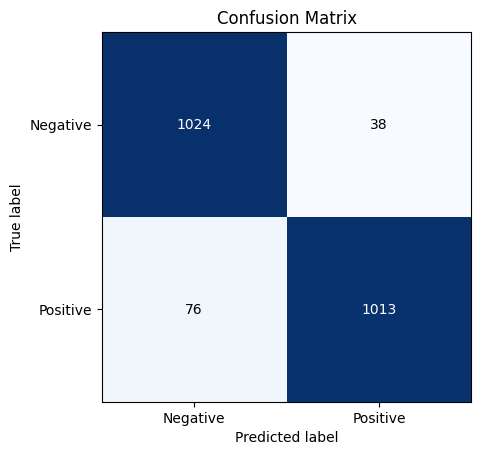

In [15]:
plt.imshow(cm, cmap=plt.cm.Blues)
# Add the labels for each class
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add the labels for each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color="white" if cm[i, j] > cm.max()/2 else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

Bring in non smote data

In [31]:
df = pd.read_csv("DataFiles/NormalizedData.csv").drop("Protein", axis=1)
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,Trans_Helices_31
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_reg = df.iloc[:,1:]
y_reg = df["DTP"]

In [33]:
predictions = model.predict(X_reg)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_reg, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the confusion matrix
cm_reg = confusion_matrix(y_reg, predictions)
print("Confusion Matrix:\n", cm_reg)

# Print the classification report
cr_reg = classification_report(y_reg, predictions)
print("Classification Report:\n", cr_reg)

Accuracy: 98.12%
Confusion Matrix:
 [[ 483   34]
 [  77 5299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       517
           1       0.99      0.99      0.99      5376

    accuracy                           0.98      5893
   macro avg       0.93      0.96      0.94      5893
weighted avg       0.98      0.98      0.98      5893



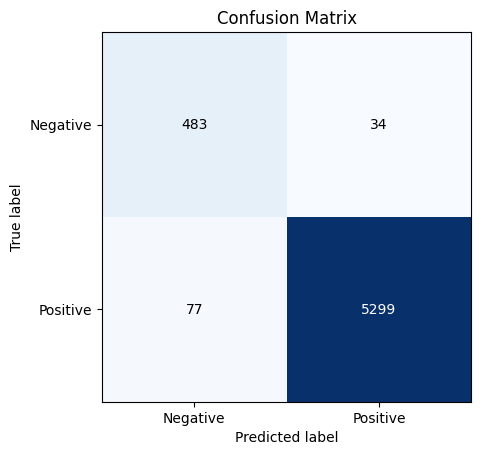

In [37]:
plt.imshow(cm_reg, cmap=plt.cm.Blues)
# Add the labels for each class
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add the labels for each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_reg[i, j], ha='center', va='center', color="white" if cm_reg[i, j] > cm.max()/2 else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)



In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 94.70%
Confusion Matrix:
 [[1024   38]
 [  76 1013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1062
           1       0.96      0.93      0.95      1089

    accuracy                           0.95      2151
   macro avg       0.95      0.95      0.95      2151
weighted avg       0.95      0.95      0.95      2151



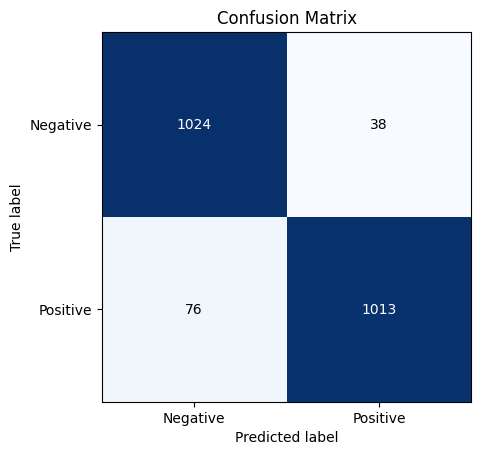

In [29]:
plt.imshow(cm, cmap=plt.cm.Blues)
# Add the labels for each class
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add the labels for each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color="white" if cm[i, j] > cm.max()/2 else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

In [38]:
from sklearn import svm

# Initialize the SVM classifier for the BSVM(SAE)
clf_SAE = svm.SVC(kernel='linear', C=47.17, gamma=8.5)

# Fit the classifier to the training data
clf_SAE.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_SAE = clf_SAE.predict(X_test)

# Initialize the SVM classifier for the BSVM(Wrapper)
clf_Wrapper = svm.SVC(kernel='linear', C=4.5, gamma=5)

# Fit the classifier to the training data
clf_Wrapper.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_Wrapper = clf_Wrapper.predict(X_test)

# Initialize the SVM classifier for the BSVM(Origin)
clf_Origin = svm.SVC(kernel='linear', C=8.552, gamma=9.503)

# Fit the classifier to the training data
clf_Origin.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_Origin = clf_Origin.predict(X_test)

BSVM(SAE) Accuracy: 74.71%
BSVM(SAE) Confusion Matrix:
 [[882 180]
 [364 725]]


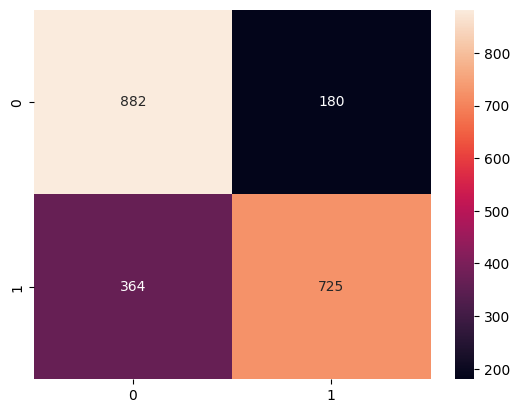

BSVM(SAE) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76      1062
           1       0.80      0.67      0.73      1089

    accuracy                           0.75      2151
   macro avg       0.75      0.75      0.75      2151
weighted avg       0.76      0.75      0.75      2151

BSVM(Wrapper) Accuracy: 74.43%
BSVM(Wrapper) Confusion Matrix:
 [[873 189]
 [361 728]]


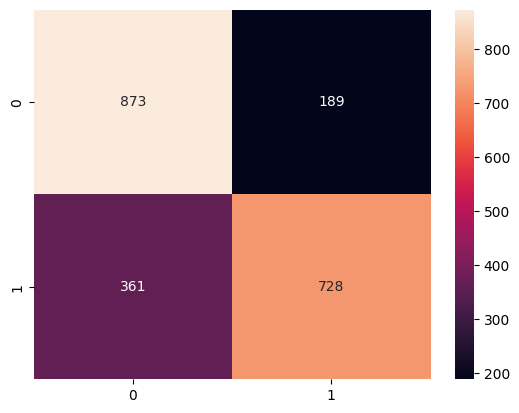

BSVM(Wrapper) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1062
           1       0.79      0.67      0.73      1089

    accuracy                           0.74      2151
   macro avg       0.75      0.75      0.74      2151
weighted avg       0.75      0.74      0.74      2151

BSVM(Origin) Accuracy: 74.43%
BSVM(Origin) Confusion Matrix:
 [[873 189]
 [361 728]]


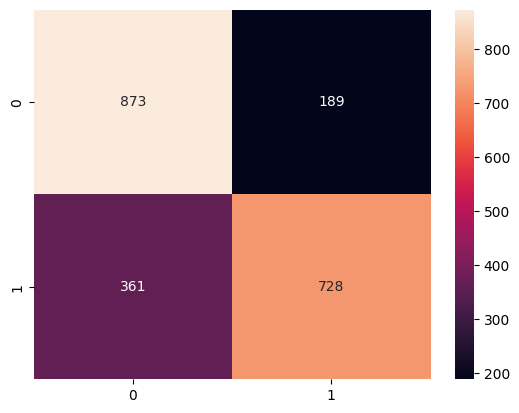

BSVM(Origin) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1062
           1       0.79      0.67      0.73      1089

    accuracy                           0.74      2151
   macro avg       0.75      0.75      0.74      2151
weighted avg       0.75      0.74      0.74      2151



In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the accuracy for the BSVM(SAE)
accuracy_SAE = accuracy_score(y_test, y_pred_SAE)
print("BSVM(SAE) Accuracy: %.2f%%" % (accuracy_SAE * 100.0))

# Plot the confusion matrix for the BSVM(SAE)
cm_SAE = confusion_matrix(y_test, y_pred_SAE)
print("BSVM(SAE) Confusion Matrix:\n", cm_SAE)
sns.heatmap(cm_SAE, annot=True, fmt="d")
plt.show()

# Print the classification report for the BSVM(SAE)
cr_SAE = classification_report(y_test, y_pred_SAE)
print("BSVM(SAE) Classification Report:\n", cr_SAE)

# Evaluate the accuracy for the BSVM(Wrapper)
accuracy_Wrapper = accuracy_score(y_test, y_pred_Wrapper)
print("BSVM(Wrapper) Accuracy: %.2f%%" % (accuracy_Wrapper * 100.0))

# Plot the confusion matrix for the BSVM(Wrapper)
cm_Wrapper = confusion_matrix(y_test, y_pred_Wrapper)
print("BSVM(Wrapper) Confusion Matrix:\n", cm_Wrapper)
sns.heatmap(cm_Wrapper, annot=True, fmt="d")
plt.show()

# Print the classification report for the BSVM(Wrapper)
cr_Wrapper = classification_report(y_test, y_pred_Wrapper)
print("BSVM(Wrapper) Classification Report:\n", cr_Wrapper)

# Evaluate the accuracy for the BSVM(Origin)
accuracy_Origin = accuracy_score(y_test, y_pred_Origin)
print("BSVM(Origin) Accuracy: %.2f%%" % (accuracy_Origin * 100.0))

# Plot the confusion matrix for the BSVM(Origin)
cm_Origin = confusion_matrix(y_test, y_pred_Origin)
print("BSVM(Origin) Confusion Matrix:\n", cm_Origin)
sns.heatmap(cm_Origin, annot=True, fmt="d")
plt.show()

# Print the classification report for the BSVM(Origin)
cr_Origin = classification_report(y_test, y_pred_Origin)
print("BSVM(Origin) Classification Report:\n", cr_Origin)
